In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

data=pd.read_csv("breast-cancer-data-training.csv")


# Logistic Regression with no regularisation

In [29]:
data=pd.read_csv("breast-cancer-data-training.csv")
data.drop(["id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [30]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values ## normalisation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) ## datasplit

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 338)
x test:  (30, 60)
y train:  (338,)
y test:  (60,)


In [4]:
print(color.BOLD + 'Results' + color.END)
logreg = linear_model.LogisticRegression(penalty='none',solver='saga',max_iter=4000000)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
theta=logreg.coef_
print("\n The coefficients without lasso regularisation:\n",theta.reshape(1,30))
y_pred=logreg.predict(x_test.T)

print("\n Classification Report")
print(classification_report(y_test.T,y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(y_test.T,y_pred))

CVresults=cross_val_score(logreg,x,y, cv=10)
print("\nCV Results:",CVresults)
print("Mean of CV Results:",np.mean(CVresults))
print("Sd of CV Results:",np.std(CVresults))

Results
test accuracy: 0.9833333333333333 
train accuracy: 0.9940828402366864 

 The coefficients without lasso regularisation:
 [[ -0.32265126   0.89000276   2.94596653   2.525958    -6.31201596
  -25.30772741  13.10855138  18.86763459  -7.5657284   -0.56237544
   26.01478369  -4.76995724  20.6613696   26.61804308   4.24061472
  -18.47178633 -11.49265727  23.47918361 -20.96444483 -15.26198789
    2.477425    19.95827828   6.08426683   7.83074577  11.07179609
    1.29187424  15.17258012  15.37116699  33.43080727   4.49825818]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.95      0.97        19

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60


 Confusion Matrix
[[41  0]
 [ 1 18]]

CV Results: [0.97560976 0.92682927 0.97560976 0.95       0.95       0.9230769

# Logistic Regression with L1 Regularisation

In [5]:
data=pd.read_csv("breast-cancer-data-training.csv")
data.drop(["id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [6]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values ## normalisation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) ## datasplit

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 338)
x test:  (30, 60)
y train:  (338,)
y test:  (60,)


In [7]:
print(color.BOLD + 'Results' + color.END)
logreg = linear_model.LogisticRegression(penalty='l1',solver="liblinear")
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
thetaLasso=logreg.coef_
print("\n The coefficients without lasso regularisation:\n",theta.reshape(1,30))
y_pred=logreg.predict(x_test.T)
print("\n Classification Report")
print(classification_report(y_test.T,y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(y_test.T,y_pred))

CVresults=cross_val_score(logreg,x,y, cv=10)
print("\nCV Results:",CVresults)
print("Mean of CV Results:",np.mean(CVresults))
print("Sd of CV Results:",np.std(CVresults))

Results
test accuracy: 0.9666666666666667 
train accuracy: 0.9674556213017751 

 The coefficients without lasso regularisation:
 [[ -0.32265126   0.89000276   2.94596653   2.525958    -6.31201596
  -25.30772741  13.10855138  18.86763459  -7.5657284   -0.56237544
   26.01478369  -4.76995724  20.6613696   26.61804308   4.24061472
  -18.47178633 -11.49265727  23.47918361 -20.96444483 -15.26198789
    2.477425    19.95827828   6.08426683   7.83074577  11.07179609
    1.29187424  15.17258012  15.37116699  33.43080727   4.49825818]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.95      0.95      0.95        19

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


 Confusion Matrix
[[40  1]
 [ 1 18]]

CV Results: [0.97560976 0.92682927 1.         0.975      0.95       0.9743589

# Logisitic Regression - Feature Selection - Filter Method

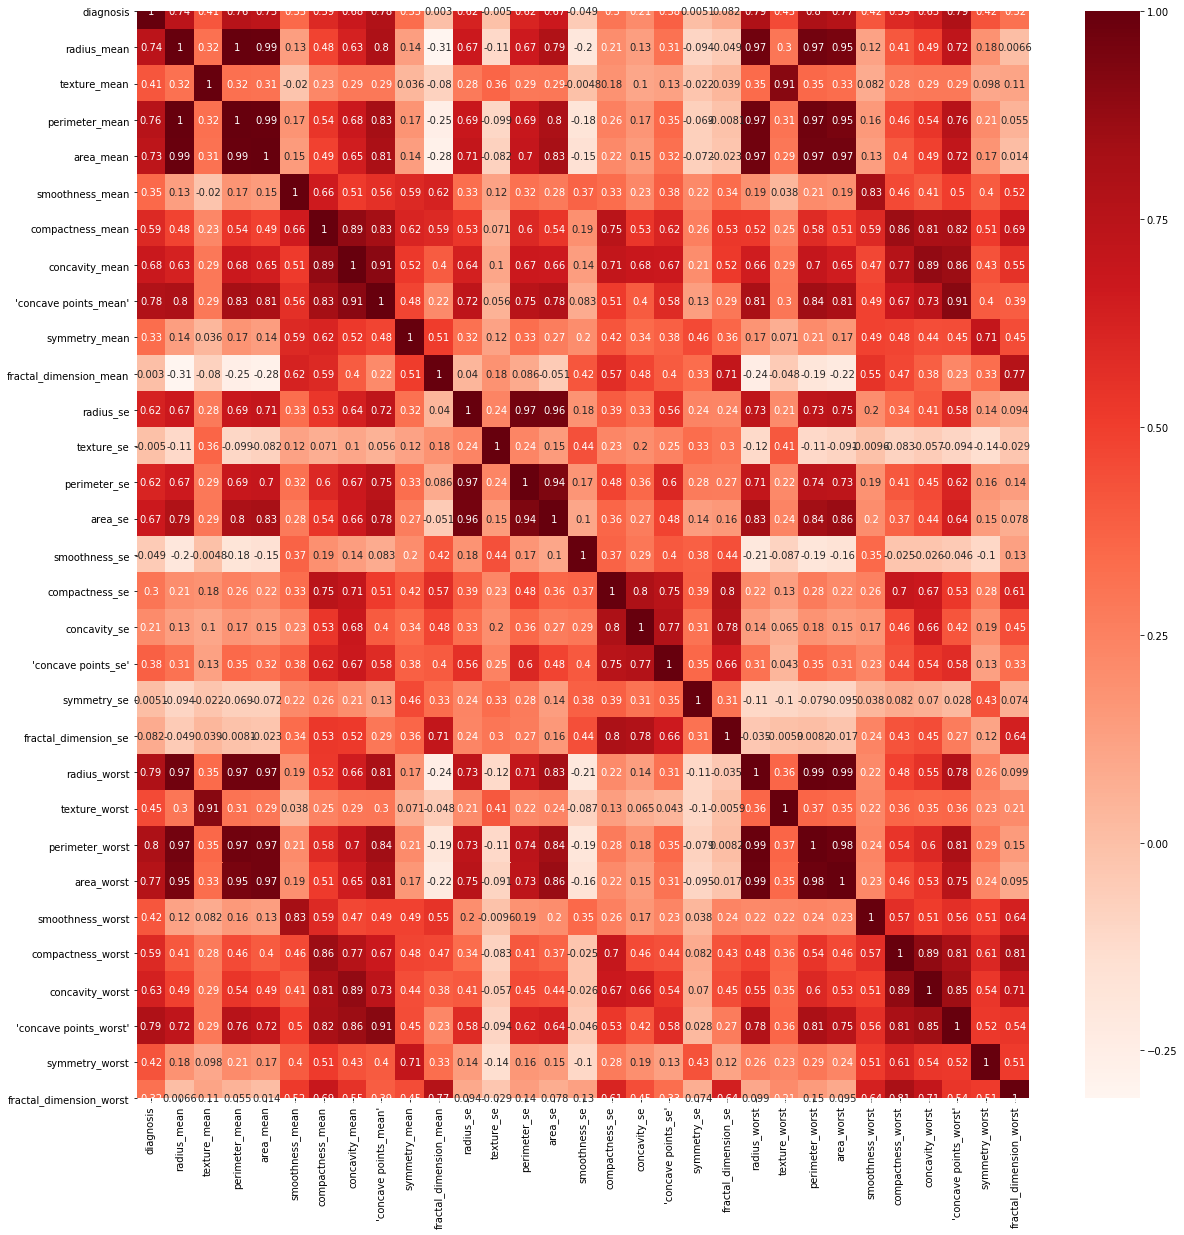

In [8]:
data=pd.read_csv("breast-cancer-data-training.csv")
data.drop(["id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [9]:
cor_target = abs(cor["diagnosis"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis                 1.000000
radius_mean               0.741656
perimeter_mean            0.756490
area_mean                 0.734001
compactness_mean          0.594239
concavity_mean            0.681989
'concave points_mean'     0.783417
radius_se                 0.624766
perimeter_se              0.616116
area_se                   0.668816
radius_worst              0.791046
perimeter_worst           0.797647
area_worst                0.765181
compactness_worst         0.591658
concavity_worst           0.633240
'concave points_worst'    0.792950
Name: diagnosis, dtype: float64

In [10]:
irrelevant_features = cor_target[cor_target<=0.5]
irrelevant_features

texture_mean               0.414657
smoothness_mean            0.349504
symmetry_mean              0.330934
fractal_dimension_mean     0.002984
texture_se                 0.004990
smoothness_se              0.049109
compactness_se             0.302757
concavity_se               0.210758
'concave points_se'        0.378088
symmetry_se                0.005092
fractal_dimension_se       0.081829
texture_worst              0.453802
smoothness_worst           0.416350
symmetry_worst             0.424881
fractal_dimension_worst    0.316159
Name: diagnosis, dtype: float64

In [11]:
data.drop(irrelevant_features.index, axis=1, inplace=True)

In [12]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [13]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (15, 338)
x test:  (15, 60)
y train:  (338,)
y test:  (60,)


In [15]:
print(color.BOLD + 'Results' + color.END)
logreg = linear_model.LogisticRegression(penalty='none',solver='saga',max_iter=4000000)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

theta=logreg.coef_
print("The Coefficient using Feature Selection - filter:\n",theta.reshape(15,1))
y_pred=logreg.predict(x_test.T)
print("\n Classification Report")
print(classification_report(y_test.T,y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(y_test.T,y_pred))

CVresults=cross_val_score(logreg,x,y, cv=10)
print("\nCV Results:",CVresults)
print("Mean of CV Results:",np.mean(CVresults))
print("Sd of CV Results:",np.std(CVresults))

Results
test accuracy: 0.9833333333333333 
train accuracy: 0.9644970414201184 
The Coefficient using Feature Selection - filter:
 [[-12.7946428 ]
 [  7.87488728]
 [-17.87758298]
 [-17.5717319 ]
 [ -1.19115502]
 [ 18.25939058]
 [ -4.15416618]
 [ -5.49075501]
 [ 41.10162197]
 [ 14.95567209]
 [ 12.69004713]
 [ 10.91824554]
 [  9.71157899]
 [  3.30704056]
 [  6.76403797]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.95      0.97        19

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60


 Confusion Matrix
[[41  0]
 [ 1 18]]

CV Results: [0.97560976 0.92682927 0.97560976 0.925      0.9        0.92307692
 1.         0.97435897 0.87179487 0.97435897]
Mean of CV Results: 0.944663852407755
Sd of CV Results: 0.03900829491732769


In [16]:
print(color.BOLD + 'Results' + color.END)
logreg = linear_model.LogisticRegression(penalty='l1',solver="liblinear")
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
theta=logreg.coef_
print("/n The regularized Coefficient  with Feature Selection - Filter:\n",theta.reshape(1,15))
y_pred=logreg.predict(x_test.T)
print("\n Classification Report")
print(classification_report(y_test.T,y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(y_test.T,y_pred))

CVresults=cross_val_score(logreg,x,y, cv=10)
print("\nCV Results:",CVresults)
print("Mean of CV Results:",np.mean(CVresults))
print("Sd of CV Results:",np.std(CVresults))

Results
test accuracy: 0.9666666666666667 
train accuracy: 0.9497041420118343 
/n The regularized Coefficient  with Feature Selection - Filter:
 [[ 0.          0.          0.          0.          0.          0.
   3.8688769   0.          0.         10.29718961  0.          0.
   0.          0.          8.17475285]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.95      0.95      0.95        19

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


 Confusion Matrix
[[40  1]
 [ 1 18]]

CV Results: [0.95121951 0.92682927 0.97560976 0.975      0.925      0.8974359
 0.94871795 0.94871795 0.92307692 0.97435897]
Mean of CV Results: 0.9445966228893058
Sd of CV Results: 0.02497348328807083


# Logisitic Regression - Feature SelectionWrapper - Backward Elimination

In [17]:
#Backward Elimination
data=pd.read_csv("breast-cancer-data-training.csv")
data.drop(["id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['radius_mean', 'texture_mean', 'compactness_mean', "'concave points_mean'", 'smoothness_se', "'concave points_se'", 'fractal_dimension_se', 'radius_worst', 'area_worst', 'symmetry_worst', 'fractal_dimension_worst']


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
data2=data[selected_features_BE]

In [19]:
x = data2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (11, 338)
x test:  (11, 60)
y train:  (338,)
y test:  (60,)


In [20]:
print(color.BOLD + 'Results' + color.END)
logreg = linear_model.LogisticRegression(penalty='none',solver='saga',max_iter=40000)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

theta=logreg.coef_
print("The coefficient using Feature Selection - Backward Elimination:\n",theta.reshape(11,1))
theta=logreg.coef_
y_pred=logreg.predict(x_test.T)
print("\n Classification Report")
print(classification_report(y_test.T,y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(y_test.T,y_pred))

CVresults=cross_val_score(logreg,x,y, cv=10)
print("\nCV Results:",CVresults)
print("Mean of CV Results:",np.mean(CVresults))
print("Sd of CV Results:",np.std(CVresults))

Results
test accuracy: 0.9666666666666667 
train accuracy: 0.8668639053254438 
The coefficient using Feature Selection - Backward Elimination:
 [[-1.75413491e-01]
 [-1.33096599e-01]
 [ 4.61230913e-04]
 [ 9.41668295e-04]
 [-1.11754133e-04]
 [-4.33394046e-05]
 [-3.60559879e-05]
 [-1.53967232e-01]
 [ 8.71861639e-03]
 [-3.08375122e-03]
 [-8.50906200e-04]]

 Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60


 Confusion Matrix
[[41  0]
 [ 2 17]]

CV Results: [0.92682927 0.85365854 0.92682927 0.825      0.8        0.92307692
 0.82051282 0.94871795 0.87179487 0.92307692]
Mean of CV Results: 0.8819496560350218
Sd of CV Results: 0.05148423989696957


# Logistics Regression - Feature Selection - Wrapper - Recursive Feature Elimination

In [21]:
data=pd.read_csv("breast-cancer-data-training.csv")
data.drop(["id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)
X = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

from sklearn.feature_selection import RFE
model = LogisticRegression(solver="liblinear")
#Initializing RFE model
rfe = RFE(model, 16)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)


[False False False  True False False  True  True False  True  True False
  True  True False  True False False False False  True  True  True  True
 False  True  True  True  True False]
[ 8  4  6  1 15  9  1  1 11  1  1  3  1  1 13  1 12 10  2  7  1  1  1  1
  5  1  1  1  1 14]


In [22]:
nof_list=np.arange(1,32)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression(solver="liblinear")
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 23
Score with 23 features: 0.958333


In [23]:
cols = list(X.columns)
model = LogisticRegression(solver="liblinear")
#Initializing RFE model
rfe = RFE(model, 23)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', ''concave points_mean'', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', ''concave points_worst'',
       'symmetry_worst'],
      dtype='object')


In [24]:
x = data[selected_features_rfe]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (23, 338)
x test:  (23, 60)
y train:  (338,)
y test:  (60,)


In [25]:
print(color.BOLD + 'Results' + color.END)
logreg = linear_model.LogisticRegression(solver="liblinear",max_iter=4000)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

theta=logreg.coef_
print("The coefficient using Feature Selection - Recursive Feature Elimination:\n",theta.reshape(1,23))
theta=logreg.coef_
y_pred=logreg.predict(x_test.T)
print("\n Classification Report")
print(classification_report(y_test.T,y_pred))
print("\n Confusion Matrix")
print(confusion_matrix(y_test.T,y_pred))

CVresults=cross_val_score(logreg,x,y, cv=10)
print("\nCV Results:",CVresults)
print("Mean of CV Results:",np.mean(CVresults))
print("Sd of CV Results:",np.std(CVresults))

Results
test accuracy: 0.9666666666666667 
train accuracy: 0.9585798816568047 
The coefficient using Feature Selection - Recursive Feature Elimination:
 [[-1.75569372 -0.00963889  0.02321083  0.00199089  0.42342897  0.23769412
   0.01013484 -0.0420654  -0.75645615 -0.45458234  0.13027193  0.00265332
   0.01179137 -0.00329892 -1.63697476  0.21735999  0.20348828  0.02202388
   0.18318053  0.75915666  1.04112953  0.43526993  0.42650857]]

 Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60


 Confusion Matrix
[[41  0]
 [ 2 17]]

CV Results: [0.97560976 0.87804878 0.95121951 0.925      0.9        0.94871795
 0.97435897 1.         1.         0.97435897]
Mean of CV Results: 0.9527313946216385
Sd of C

In [26]:
# from sklearn.model_selection import KFold # import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
# y = np.array([1, 2, 3, 4]) # Create another array
# kf = KFold(n_splits=2) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# print(kf) 

In [27]:
# for train_index, test_index in kf.split(X):
#  print('TRAIN:', train_index, 'TEST:', test_index)
#  X_train, X_test = X[train_index], X[test_index]
#  y_train, y_test = y[train_index], y[test_index]
